# Analysis for the relationship between salary and years of professional coding experience, considering education levels, company size and job type?

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
data_df = pd.read_csv('/Users/tinglu/Desktop/stack-overflow-survey/final_data.csv')
data_df.head()

,Age,EdLevel,YearsCodePro,DevType,CompanySize,Salary_USD
0,18-35 years old,Master,2,DS/MLE,Small(1-99),42480.0
1,18-35 years old,Bachelor,5,DS/MLE,Large(>1000),130000.0
2,18-35 years old,Master,2,DE/DA/BA,Large(>1000),28320.0
3,>35 years old,Doctoral(PhD),8,DS/MLE,Medium(100-999),158000.0
4,18-35 years old,Doctoral(PhD),1,DS/MLE,Small(1-99),100000.0


In [17]:
data_df['EdLevel'].value_counts()

Master           3260
Bachelor         3187
Doctoral(PhD)     771
Name: EdLevel, dtype: int64

In [18]:
data_df['DevType'].value_counts()

DE/DA/BA    3908
DS/MLE      3310
Name: DevType, dtype: int64

### Transform years of professional coding experience from string to integer format

In [19]:
years_pro_dict = {
    'Less than 1 year': 1,
    'More than 50 years':51
}

data_df.loc[:, 'YearsCodePro'] = data_df['YearsCodePro'].replace(years_pro_dict)
data_df['YearsCodePro'] = data_df['YearsCodePro'].astype(int)

### Show distribution of years of professional coding experience using histogram

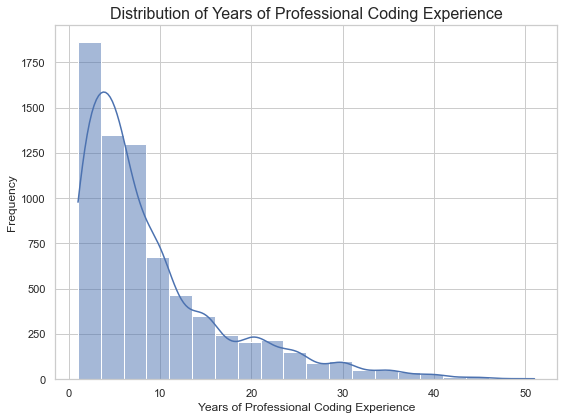

In [20]:
# Set a professional color palette
sns.set_palette("colorblind")
sns.set_theme(style="whitegrid")

# Create the figure and set its facecolor
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor('white')  # Set the background color of the figure

# Custom font settings (adjust font family and size as needed)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12

# Plot the histogram
sns.histplot(data=data_df, x='YearsCodePro', bins=20, kde=True, ax=ax)
ax.set_xlabel('Years of Professional Coding Experience')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Years of Professional Coding Experience', fontsize=16)

plt.tight_layout()
plt.show()

### Calculate the ratio of the group with YearsCodePro > 15 to the total population

In [21]:
total_population = len(data_df)
group_greater_than_15 = len(data_df[data_df['YearsCodePro'] <= 20])
ratio = group_greater_than_15 / total_population

print(f"The ratio of people with YearsCodePro <= 20 to the total population is: {ratio:.2%}")

The ratio of people with YearsCodePro <= 15 to the total population is: 83.24%


Notably, 83% of individuals with under 20 years of coding experience comprise a substantial portion. Hence, our focus narrows to this group for more meaningful analysis, aligning with data science’s evolution since 2000

In [22]:
data_df = data_df[data_df['YearsCodePro'] <= 20]

### Show Relationship between Salary and Years of professional coding by Education Level and Job Type using regression line plot

Based on the relevant information, data scientists' minimum annual salary in most developed countries is set at 40,000 USD. Consequently, I will conduct the analysis considering only annual salaries exceeding this threshold, as it is likely to yield more realistic insights.

In [23]:
data_df = data_df[data_df['Salary_USD'] >= 40000]

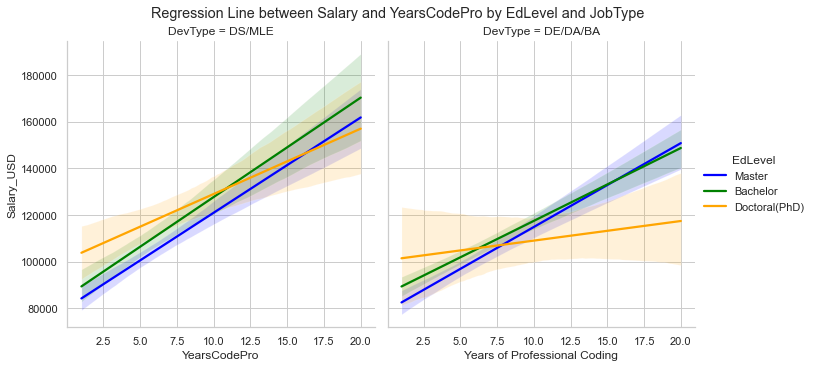

In [24]:
custom_palette = {
    'Master': 'blue',
    'Doctoral(PhD)': 'orange',
    'Bachelor': 'green',
}

g = sns.lmplot(data=data_df, x='YearsCodePro', y='Salary_USD', hue='EdLevel', col='DevType', col_wrap=2,
               palette=custom_palette, scatter_kws={'alpha': 0.3}, scatter=False) 

plt.xlabel('Years of Professional Coding')
plt.ylabel('Salary')
plt.suptitle('Regression Line between Salary and YearsCodePro by EdLevel and JobType', y=1.02)
plt.show()


At the start of each role, PhD holders receive higher starting pay compared to those with master’s (MS) and bachelor’s (BS) degrees. With experience, all roles see rapid salary growth. Data Scientists (DS) and Machine Learning Engineers (MLEs) begin with slightly better pay than Data Analysts (DAs), Data Engineers (DEs), and Business Analysts (BAs), but the growth trend is similar.

For DAs, DEs, and BAs, this changes after around 6 years of experience. At this point, MS and BS degree holders experience faster compensation growth, highlighting the challenge for PhD holders to leverage their strengths in these positions.

In DS and MLE roles, PhD holders sustain a pay advantage in the first decade of their careers. However, the rate of salary increase is slightly less steep compared to MS/BS degree holders. After about 10 years, salaries for PhD holders and those with MS/BS degrees intersect around $130,000. This shows that while PhDs initially lead to higher starting salaries, the difference diminishes as experience accumulates.

The confidence interval for the salary range of individuals holding a Ph.D. degree is notably broad, indicative of a considerable variance. Similarly, the confidence intervals for Master's and Bachelor's salary levels expand with increasing work experience. This phenomenon underscores the distinct individuality associated with a Ph.D., suggesting that personal competence and unique research areas can lead to substantial variations in salary outcomes.

### Relationship between Salary and Years of professional coding by Education Level and Company Size

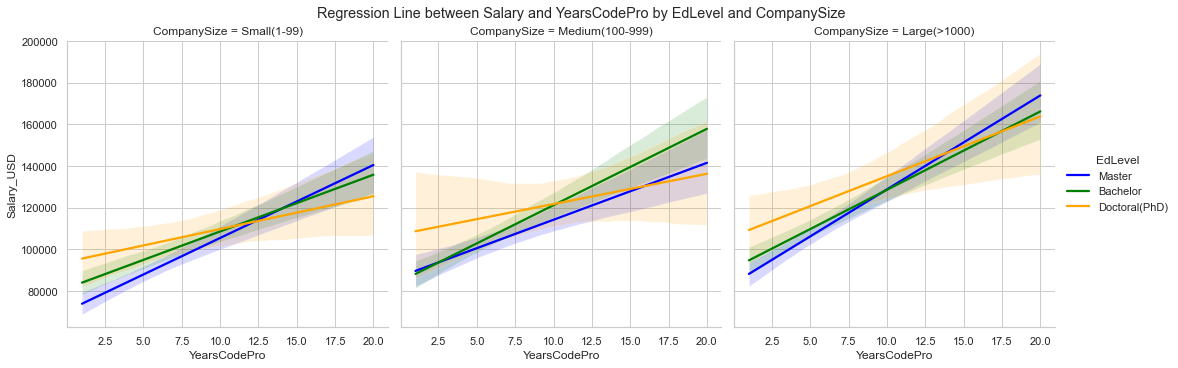

In [25]:
sns.lmplot(data=data_df, x='YearsCodePro', y='Salary_USD',hue ='EdLevel', col='CompanySize',
               palette=custom_palette, scatter_kws={'alpha': 0.1},scatter=False, 
           col_order=['Small(1-99)', 'Medium(100-999)', 'Large(>1000)'])

plt.ylabel('Salary')
plt.suptitle('Regression Line between Salary and YearsCodePro by EdLevel and CompanySize', y=1.02)
plt.show()

The growth rate among individuals with varying education levels shows minimal disparity across different company sizes. However, a more pronounced distinction emerges in the overall salary levels, with larger companies notably outpacing medium and small enterprises.